# GMIT_Programming_for_data_analysis_Assignment
Contains the practical assignment for the programming for data analysis module

### Problem statement
The following assignment concerns the numpy.random package in Python [1]. You are
required to create a Jupyter [2] notebook explaining the use of the package, including
detailed explanations of at least five of the distributions provided for in the package.
There are four distinct tasks to be carried out in your Jupyter notebook.
1. Explain the overall purpose of the package.
2. Explain the use of the “Simple random data” and “Permutations” functions.
3. Explain the use and purpose of at least five “Distributions” functions.
4. Explain the use of seeds in generating pseudorandom numbers.





### 1. Explain the overall purpose of the package.

There is an interesting analogy between the numpy package itself, and its child package, numpy.random [3]. Just as numpy is so much more than a package that simply allows one to efficiently create multi-dimensional arrays, numpy.random is so much more than a package that just allows one to efficiently create random numbers (or pseudo-random numbers - pseudoransomness will be discussed below, under the 'SeedSequance' object). Just as numpy allows the user to easily and efficiently *do* things with matrices, numpy.random allows one to *do* things with random numbers, namely, generate them according to what are called * probability distributions*. In this sense, numpy.random allows the user to create both random numbers as well as numbers that are more or less probable. Numpy.random also has further use cases such as performing certain actions on arrays like randomly choosing a selection of items from the array of shuffling the contents of the array.

The 'structure' of the numpy.random package is as follows:

1. The object that the user is expected to interact with is the 'Generator' [4]. This is the object that can call the various functions which generate numbers according to a certain probability distribution (as well other functions such as shuffling).


2. This 'Generator' object itself uses another lower-level object that the user generally does not need to interact with, as this object can be created and handled in the background when the user creates the 'Generator' object. This lower-level object is the 'BitGenerator' [5], and this object is responsible for actually generating the random streams bits which the 'Generator' will then take up and apply a probablity distribution to. The 'BitGenerator' can be thought of as the conveyor belt that provides the numpy.random factory with random bits, and the 'Generator' can be thought of as the machine that 'decides' which bits to keep and which to discard according to the probability selection that the user, the machine operator, has selected on.


3. There is one further object in the numpy.random package, the 'SeedSequence' [6]. This object is used to determine the initial entropy that will be used by the 'BitGenerator' object to generate its pseudorandom bitstream. When a 'BitGenerator' object is created without first specifying the 'SeedSequence' to be used, the entropy is taken from the Operating System itself. The only case where this is not acceptable is where the psuedorandom bitstreams (and thus the pseudorandom numbers generated by the 'Generator' object) need to be repeatable for whatever reason. In this case, the user can create a 'SeedSequence' object, note the entropy of that object (SeedSequence.entropy), and then use that same initial entropy every time a 'BitGenerator' object needs to be created. This will allow the user to obtain identical sets of pseudorandom numbers (hence their *pseudorandomness* - they are actually created from a *specified* initial entropy and a *specified* algorithm).

Although one could first create a SeedSequence object using the SeedSequence constructor, then pass that to the BitGenerator constructor to create a a BitGenerator object, and finally pass that to a Generator constructor to create a Generator object to actually call the various functions that will generate the random numbers etc., the numpy documentation recommends simply creating a Generator object directly using the **default_rng** constructor, which handles the bit stream generation in the background. I will use this default constructor except where I wish to demonstrate what manually creating a SeedSequence object can achieve.

### 2. Explain the use of the “Simple random data” and “Permutations” functions.


There are four functions that can be called be a Generator object and fall under the heading, 'Simple random data':

1. **integers**(low[, high, size, dtype, endpoint]) - returns random integers from low (inclusive) to high (exclusive), or if endpoint=True, low (inclusive) to high (inclusive). [7]


2. **random**([size, dtype, out]) - returns random floats in the half-open interval [0.0, 1.0). [8]


3. **choice**(a[, size, replace, p, axis, shuffle]) - generates a random sample from a given 1-D array [9]


4. **bytes**(length) - returns random bytes. [10]


What each of these functions does is clearly explained in the docs, and in any case there is not much that needs explaining. The **integers** function generate random integers, the **random** function generates random floating points or doubles, the **choice** function randomly selected a given number of items from an inputted array, and the **bytes** function generates random bytes of a length specified by the user.






1. The **integer** function The choice function has one mandatory parameter, which is the array or integer that a 'choice' will be made from (in case of an integer, the integer is first past to numpy.arange()). There are a number of other non-mandatory options:


* int or tuple of ints, **size** - in the case of an int, this determines the length the array returned, in that of a tuple of ints,  the dimensional shape is determined
* int or array of ints, **low** & **high** - determines the max and min numbers in the array to choose from, either for each choice or for that choice whose index is equal to that of this array of ints.
* dtype, **dtype** - the dtype to be returned (the default is np.int64, although unsigned 8, 16, 32 and 64 bit integers can also be specified)

In [1]:
import numpy as np
rng = np.random.default_rng()

print(rng.integers(2, size=10)) # random
print(rng.integers(1, size=10)) # only one value to choose from!

rng.integers([1, 3, 5, 7], high=[[10], [20]], dtype=np.uint16)

[0 0 1 1 0 1 1 0 1 1]
[0 0 0 0 0 0 0 0 0 0]


array([[ 5,  9,  9,  7],
       [10,  8, 18, 17]], dtype=uint16)

2. The **random** function returns random floats from between 0.0 and 1.0, and takes the same size parameter as **integers**, with the dtype defaulting to np.float64 and with float32 specifiable. There is also an out parameter that can specify an array to contain the return floats. Note that because floats between 0.0 and 1.0 are returned, if one wants to extend the range of values generated one can multiply the result by the desired range, and to alter the minimum value one adds or subtracts a the desired minimum to/from the result. The maximum value is them automatically set through this also.

In [2]:
5 * rng.random((3, 2)) - 5

array([[-4.54030162, -3.01936011],
       [-0.52337913, -4.67553714],
       [-4.88666902, -1.78666408]])

3. The **choice** function has one mandatory parameter, which is the array or integer that a 'choice' will be made from (in case of an integer, the integer is first past to numpy.arange()). There are a number of other non-mandatory options, including size, as above:


* boolean, **replace** - whether the chosen values are put back into the original array so that they can be chosen again, the default is True
* arraylikme, **p** - an array, equal in length to the inputted array / arange, of floating points less between 0.0 and 1.0, representing the probability that the corresponding item in the inputted array will be chosen
* int, **axis** - which dimension should values be selected from (0, the default, represents rows, 1 columns)
* boolean, **shuffle** - whether the order of the selected numbers should be rearranged

In [3]:
print(rng.choice(5))
print(rng.choice([0,1,2,3,4]))
print(rng.choice(5, p=[0,0,0,0,1])) # here 4 will always be chosen
print(rng.choice(5, size=(4,4), axis=1))
print(rng.choice(10, size=10, replace=False)) # note that each value will only be chosen once
print(rng.choice(10, size=10))
print(rng.choice(10, 10, shuffle=False)) # shuffling has little effect, as the numbers are already chosen pseudorandomly

2
1
4
[[1 0 2 4]
 [3 0 3 0]
 [3 2 4 0]
 [2 0 1 2]]
[4 5 3 2 6 0 1 9 7 8]
[3 0 0 0 0 1 7 0 8 2]
[4 1 8 5 7 9 4 3 0 0]


4. The **bytes** function only takes one parameter,length, which determines the number of bytes returned. This parameter is mandatory.

In [4]:
# print(rng.bytes()) will result in a TypeError
# print(rng.bytes([1])) will result in a TypeError
print(rng.bytes(1))
print(rng.bytes(5))
print(rng.bytes(10))

b'a'
b'\xc4ISP\xd3'
b'\xd4P&\xf1\xd1l&\xc8\xba\xe1'


#### 'Permutations'

The two Generator functions that fall under the heading, 'Permutations', differ from each other only slightly. **shuffle** shuffles the contents of an array *in-place*, i.e. changing the original array. **permutation**, on the other hand, replicates the array and then shuffles the replication, leaving the original array unchanged. Because **shuffle** does not create a new array, it also, does not return anything, unlike **permutation**, which returns the new array. Where a multi-dimensional array is inputted to either functions, an optional parameter, **axis** can be specified. This must be an int, and determines which dimension is to be shuffled, 0 for rows (the default) and 1 for columns.

In [5]:
array = np.arange(9)
rng.permutation(array)
print(array) # the array has not changed
rng.shuffle(array)
print(array) # the array has  changed

[0 1 2 3 4 5 6 7 8]
[6 1 7 0 5 8 3 2 4]


### 3. Explain the use and purpose of at least five “Distributions” functions.


#### 1. Binomial Distribution 

The binomial distribution is the distribution of numbers that occurs when one counts the number of times a given event of probability 'p' occurs for a set of 'n' events over a given number of trials. Flipping a coin ten times and counting the number of times heads turns up, and then repeating this ten more times, would give one a binominal distribution. The binomial distribution in most cases approximates to the normal distribution, although there are differences between the two distributions.
1. Binomial distribution is a discrete probability distribution (there are a finite set of values for the variable whose values we are measuring, true or false and the number of times we perform a trial) whereas the normal distribution is a continuous distribution (there are theoretically an infinite number of values for the variable being measured).
2. The probability mass functions (which determine the probability that the measured variable is exactly equal to some value) of both are different (technically the normal distribution does not even have a pmf, as pmfs are exclusive to discrete random variable - rather it has a probability distribution functions). [19]
3. Binomial distribution is approximated with normal distribution under certain conditions but not the other way around. [15]

Numpy's  random.binomial function takes in a number of trials, the probability of each trial resulting in a True value, and the number of sets of trials, returning an array whose length is the number of sets of trials run, in this case {len(s)}, \
with each value in the array representing the number of times the trials in each set of trials resulted in a 'True' outcome.

A succinct yet easily comprehensible explanations of the relation between the Test Statistic and the p-value is found on Wikipedia:

> If ${\displaystyle T}$ is a real-valued random variable representing some function of the observed data, to be used as a test-statistic for testing a hypothesis ${\displaystyle H}$ because large values of ${\displaystyle T}$ would seem to discredit the hypothesis, and if it happens to take on the actual value {\displaystyle t}t, then the p-value of the so called one-sided test of the null-hypothesis ${\displaystyle H}$ based on that test-statistic is the largest value of the probability that ${\displaystyle T}$ could be larger than or equal to ${\displaystyle t}$ if ${\displaystyle H}$ is true. [18]

In [6]:
import matplotlib.pyplot as plt
from collections import Counter

rng = np.random.default_rng()
n, p = 10, .5  # number of trials, probability of each trial
binom = rng.binomial(n, p, 10) # 10 represents the number of sets of trials
print("The collections package's 'Counter' function is a useful way \
to understand the results without having to plot them. \
As the probability of True is here 0.5, we would expect, for sets of ten \
events \(which we can think of as coin tosses\), we would most \
frequently get 5 true outcomes, followed by 4 or 6 true outcomes, \
following by 3 and 7, then 2 and 8, 1 and 9, and finally, 0 and 10. \
Of course, the likelihood of this order increases with the number of trials.\n")
print(Counter(binom))
binom = rng.binomial(n, p, 50)
print(Counter(binom))
binom = rng.binomial(n, p, 250)
print(Counter(binom))
binom = rng.binomial(n, p, 1000)
print(Counter(binom))

print("\nWe can see this more easily with a histogram:")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(15,7))
plt.suptitle("No. of heads per 10 coin tosses - for 10, 50, 250 and 1000 trials")

binom = rng.binomial(n, p, 10)
labels, counts = np.unique(binom, return_counts=True)
ax1.bar(labels, counts, align='center', edgecolor='k')
plt.gca().set_xticks(np.arange(11))
ax1.set_ylabel("No. of Trials")

binom = rng.binomial(n, p, 50)
labels, counts = np.unique(binom, return_counts=True)
ax2.bar(labels, counts, align='center', edgecolor='k')
ax2.set_xticklabels(np.arange(11))

binom = rng.binomial(n, p, 250)
labels, counts = np.unique(binom, return_counts=True)
ax3.bar(labels, counts, align='center', edgecolor='k')
ax3.set_ylabel("No. of Trials")

binom = rng.binomial(n, p, 1250)
labels, counts = np.unique(binom, return_counts=True)
ax4.bar(labels, counts, align='center', edgecolor='k')
ax4.set_xlabel("No. of heads after 10 coin tosses")
plt.show()

The collections package's 'Counter' function is a useful way to understand the results without having to plot them. As the probability of True is here 0.5, we would expect, for sets of ten events \(which we can think of as coin tosses\), we would most frequently get 5 true outcomes, followed by 4 or 6 true outcomes, following by 3 and 7, then 2 and 8, 1 and 9, and finally, 0 and 10. Of course, the likelihood of this order increases with the number of trials.

Counter({6: 5, 5: 4, 7: 1})
Counter({5: 14, 4: 13, 6: 11, 3: 6, 7: 4, 8: 2})
Counter({5: 59, 4: 58, 6: 50, 3: 32, 7: 20, 8: 14, 2: 9, 9: 5, 1: 2, 0: 1})
Counter({5: 247, 6: 219, 4: 207, 7: 116, 3: 114, 8: 46, 2: 29, 9: 12, 1: 6, 0: 2, 10: 2})

We can see this more easily with a histogram:


<Figure size 1500x700 with 4 Axes>

By increasing the number of trials per set as well as the number of sets, and plotting a scatter plot of the count of True values per set of trials, one can see the similarity with the bell curve of the normal distribution, which will be the next distribution I will explore. Note also that although in this case I have changed the probability of heads (True) to 0.7, the shape of the curve is unaffected.

I will also run a D'Agostino K^2 test [16] to test if the distribution could have arisen from normally distributed data. This test computes two values, skew and kurtosis:
* Skew is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.
* Kurtosis quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.
Scipy.stats has a 'normaltest' function that performs this test, returning a value (the 'Test Statistic' [17]) that is generated from the skew and the kurtosis of the data, as well as a p-value. Of course, the generation of a Test Statistic and a p-value is a common feature of statistical tests. Essentially, the evaluation process is as follows:

1. Once the data is pushed through the testing function, a single value, the Test Statistic, is produced. This value can be said to 'represent' the data from the perspective of the test.

2. Although generally a lower Test Statistic value indicates that the hypothesis being tested is correct, because the actual Test Statistic value is only meaningful from the perspective of the particular kind of test being run, we need to know how to interpret it independent of that particular kind of test. As such, a corresponding 'p-value' is generated, which represents the probability that the Test Statistic generated would have been generated if our hypothesis was correct. If this p-value is close to zero, we can assume that the hypothesis was not correct. Generally, the maximum acceptable value of the p-value is 0.05.

Thus, if the p-value is less than 0.05, we would conclude that the distribution is not indeed normal. The p-value does indeed turn out to be far smaller than 0.05, which shows that merely looking at a plot is not always sufficient to determine the kind of distribution that has produced the plot, as the binominal distribution below appears indistuinguishable to the eye from the normal distrubution.

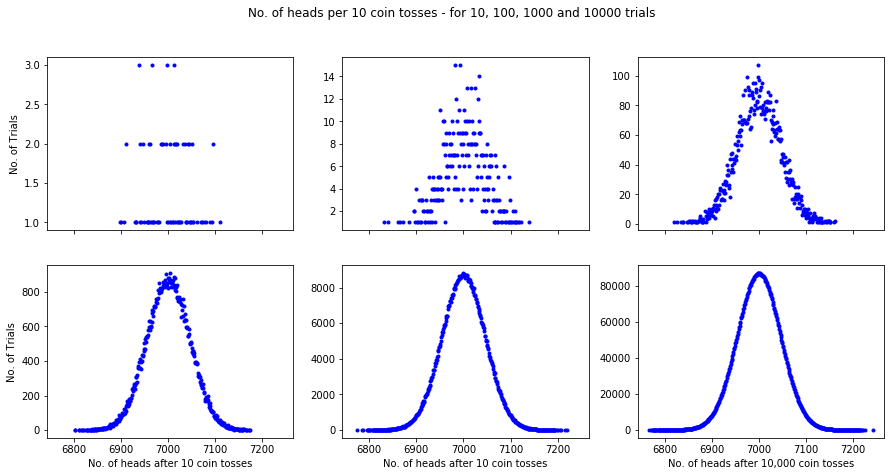

Statistics=169.540, p=0.000
The data does not appear to be normally distributed.


In [11]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(15,7))
plt.suptitle("No. of heads per 10 coin tosses - for 10, 100, 1000 and 10000 trials")

n, p = 10000, .7  # number of trials, probability of each trial

binom = rng.binomial(n, p, 100)
labels, counts = np.unique(binom, return_counts=True)
ax1.plot(labels, counts, 'b.')
ax1.set_ylabel("No. of Trials")

binom = rng.binomial(n, p, 1000)
labels, counts = np.unique(binom, return_counts=True)
ax2.plot(labels, counts, 'b.')


binom = rng.binomial(n, p, 10000)
labels, counts = np.unique(binom, return_counts=True)
ax3.plot(labels, counts, 'b.')

binom = rng.binomial(n, p, 100000)
labels, counts = np.unique(binom, return_counts=True)
ax4.plot(labels, counts, 'b.')
ax4.set_xlabel("No. of heads after 10 coin tosses")
ax4.set_ylabel("No. of Trials")

binom = rng.binomial(n, p, 1000000)
labels, counts = np.unique(binom, return_counts=True)
ax5.plot(labels, counts, 'b.')
ax5.set_xlabel("No. of heads after 10 coin tosses")

binom = rng.binomial(n, p, 10000000)
labels, counts = np.unique(binom, return_counts=True)
ax6.plot(labels, counts, 'b.')
ax6.set_xlabel("No. of heads after 10,000 coin tosses")
plt.show()


import scipy.stats as ss
stat, p = ss.normaltest(binom)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05 # we will accept anything over 95% certainty
if p > alpha:
	print('The data does not appear to be normally distributed.')
else:
	print('The data does not appear to be normally distributed.')

#### 2. Normal Distribution 

The Generator.normal function takes in three parameters, the mean of the distrubtion to be created, its standard deviation, as well as the (optional) size of the output shape (teh default is a one dimensional array).

The first thing to notice is that if we plot the values against their counts, we will not arrive at the bell-curve-like plot above, but rather a single horizontal line. This is because the normal distribtion is *continous* rather than discrete, meaning that there is an infinite amount of possible values, and as such that most likely each value will only appear once.

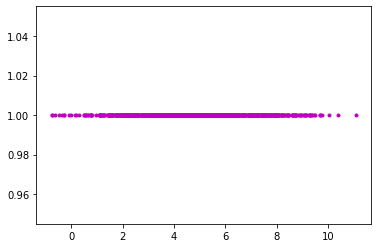

In [26]:
mu, sigma = 5, 2 # mean and standard deviation

norm = rng.normal(mu, sigma, 1000)
labels, counts = np.unique(norm, return_counts=True)
plt.plot(labels, counts, 'm.')
plt.show()

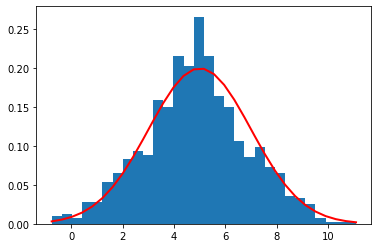

In [32]:
count, bins, ignored = plt.hist(norm, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

### 4. Explain the use of seeds in generating pseudorandom numbers.

The supposedly random numbers generated by the Generator functions are termed pseudorandom because they are generated using a combination of an initial entropy state and an algorithm. If one knows the inital entropy state and the algorithm, then one knows what numbers will be generated, hence the not-quite-random nature of the numbers. Numpy uses the random.SeedSequance class to determine the initial entropy state, and the random.BitGenerator class to determine the algorithm and combine it with a SeedSequance object to create the random bit stream that will be used by the Generator class to generate random numbers according to a particular probability distribution. It is important to note, however, that while a bit stream can be reproducible if one known its entropy and algorithm, the actual distribution produced by the Generator functions using that bit stream will not be.

This SeedSequance object is used to determine the initial entropy that will be used by the 'BitGenerator' object to generate its pseudorandom bitstream. When a 'BitGenerator' object is created without first specifying the 'SeedSequence' to be used, the entropy is taken from the Operating System itself. The only case where this is not acceptable is where the psuedorandom bitstreams (and thus the pseudorandom numbers generated by the 'Generator' object) need to be repeatable for whatever reason, for example where the results of an algorithm need to be reproducible so that the algorithm's result can be verified by other others that are running the code implementing the alogorithm. In this case, the user can create a 'SeedSequence' object, note the entropy of that object (SeedSequence.entropy), and then use that same initial entropy every time a 'BitGenerator' object needs to be created. This will allow the user to obtain identical sets of pseudorandom numbers (hence their pseudorandomness - they are actually created from a specified initial entropy and a specified algorithm).

Although one could first create a SeedSequence object using the SeedSequence constructor, then pass that to the BitGenerator constructor to create a a BitGenerator object, and finally pass that to a Generator constructor to create a Generator object to actually call the various functions that will generate the random numbers etc., the numpy documentation recommends simply creating a Generator object directly using the default_rng constructor, which handles the bit stream generation in the background. 

PCG64, the bit stream generating algorithm that is the default used by the BitGenerator classs, makes a guarantee that a fixed seed and will always produce the same random integer stream, which is what we expect of a pseudorandom series of numbers [14].

In [9]:
sq1 = np.random.SeedSequence() # generate a SeedSequence
sq1.entropy
sq2 = np.random.SeedSequence(sq1.entropy)
np.all(sq1.generate_state(10) == sq2.generate_state(10)) # np.all checks if two numpy arrays' contents are equal

bg1 = np.random.PCG64(sq1) # PCG64 is the default BitGenerator algorithm
bg2 = np.random.PCG64(sq1)
print(bg1.random_raw()) # see that the BitGenerators' bit streams are the same
print(bg2.random_raw())

rg = np.random.Generator(bg1) # create our Generator with our BitGenerator
print(rg.integers(20)) # the Generator functions will still produce different results 
print(rg.integers(20)) # even though the underlying BitGenerators are the same


8516225103495156683
8516225103495156683
3
19


### References
[1] NumPy developers. Numpy. http://www.numpy.org/.

[2] Project Jupyter. Project jupyter home. http://jupyter.org/.

[3] https://numpy.org/doc/stable/reference/random/index.html

[4] https://numpy.org/doc/stable/reference/random/generator.html

[5] https://numpy.org/doc/stable/reference/random/bit_generators/generated/numpy.random.BitGenerator.html#numpy.random.BitGenerator

[6] https://numpy.org/doc/stable/reference/random/bit_generators/generated/numpy.random.SeedSequence.html#numpy.random.SeedSequence

[7] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers

[8] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random

[9] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice

[10] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes

[11] https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng

[12] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle

[13] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation

[14] https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html

[15] https://www.differencebetween.com/difference-between-binomial-and-vs-normal-distribution/

[16] https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

[17] https://en.wikipedia.org/wiki/Test_statistic

[18] https://en.wikipedia.org/wiki/P-value

[19] https://www.datacamp.com/community/tutorials/probability-distributions-python